In [74]:
# Check all tables and columns in the database
import duckdb
with duckdb.connect("data/sakila.duckdb") as conn:
    description = conn.sql("DESC;").df()

description


,database,schema,name,column_names,column_types,temporary
0,sakila,staging,_dlt_loads,"[load_id, schema_name, status, inserted_at, sc...","[VARCHAR, VARCHAR, BIGINT, TIMESTAMP WITH TIME...",False
1,sakila,staging,_dlt_pipeline_state,"[version, engine_version, pipeline_name, state...","[BIGINT, BIGINT, VARCHAR, VARCHAR, TIMESTAMP W...",False
2,sakila,staging,_dlt_version,"[version, engine_version, inserted_at, schema_...","[BIGINT, BIGINT, TIMESTAMP WITH TIME ZONE, VAR...",False
3,sakila,staging,actor,"[actor_id, first_name, last_name, last_update,...","[DECIMAL(38,9), VARCHAR, VARCHAR, TIMESTAMP, V...",False
4,sakila,staging,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
5,sakila,staging,category,"[category_id, name, last_update, _dlt_load_id,...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",False
6,sakila,staging,city,"[city_id, city, country_id, last_update, _dlt_...","[BIGINT, VARCHAR, BIGINT, TIMESTAMP, VARCHAR, ...",False
7,sakila,staging,country,"[country_id, country, last_update, _dlt_load_i...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",False
8,sakila,staging,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",False
9,sakila,staging,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",False


In [75]:
# Connect to DuckDB database (created by dlt pipeline)
conn = duckdb.connect("data/sakila.duckdb")

In [76]:
# Task 1a - Movies longer than 180 minutes
# Filter films by length > 180, sort by longest first

conn.sql("""
    SELECT title, length
    FROM staging.film
    WHERE length > 180
    ORDER BY length DESC, title
""").df()

,title,length
0,CHICAGO NORTH,185
1,CONTROL ANTHEM,185
2,DARN FORRESTER,185
3,GANGS PRIDE,185
4,HOME PITY,185
5,MUSCLE BRIGHT,185
6,POND SEATTLE,185
7,SOLDIERS EVOLUTION,185
8,SWEET BROTHERHOOD,185
9,WORST BANGER,185


In [77]:
# Task 1b - Movies with exactly "love" in title
# Using regex - \b means word boundary (matches whole word only)
conn.sql("""
    SELECT title, rating, length, description
    FROM staging.film
    WHERE REGEXP_MATCHES(LOWER(title), '\\blove\\b')
    ORDER BY title
""").df()

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
3,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
4,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...


In [78]:
# Task 1b - Movies with "love" in title
# Using LIKE - check all possible positions of "love"
conn.sql("""
    SELECT title, rating, length, description
    FROM staging.film
    WHERE LOWER(title) LIKE '% love %'
        OR LOWER(title) LIKE 'love %'
        OR LOWER(title) LIKE '% love'
        OR LOWER(title) = 'love'
    ORDER BY title
""").df()

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
3,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
4,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...


In [79]:
# Task 1c - Descriptive statistics for film length
conn.sql("""
    SELECT 
        MIN(length) AS shortest,
        ROUND(AVG(length), 2) AS average,
        MEDIAN(length) AS median,
        MAX(length) AS longest
    FROM staging.film
""").df()

,shortest,average,median,longest
0,46,115.27,114.0,185


In [80]:
# Task 1d - Top 10 most expensive films per day
conn.sql("""
    SELECT 
        title,
        rental_rate,
        rental_duration,
        ROUND(rental_rate / rental_duration, 2) AS day_cost
    FROM staging.film
    ORDER BY day_cost DESC, title
    LIMIT 10
""").df()

,title,rental_rate,rental_duration,day_cost
0,ACE GOLDFINGER,4.99,3,1.66
1,AMERICAN CIRCUS,4.99,3,1.66
2,AUTUMN CROW,4.99,3,1.66
3,BACKLASH UNDEFEATED,4.99,3,1.66
4,BEAST HUNCHBACK,4.99,3,1.66
5,BEHAVIOR RUNAWAY,4.99,3,1.66
6,BILKO ANONYMOUS,4.99,3,1.66
7,CARIBBEAN LIBERTY,4.99,3,1.66
8,CASPER DRAGONFLY,4.99,3,1.66
9,CASUALTIES ENCINO,4.99,3,1.66


In [81]:
# Task 1e - Top 10 actors by number of movies
# JOIN: actor -> film_actor (to count films per actor)
conn.sql("""
    SELECT 
        a.first_name || ' ' || a.last_name AS actor,
        COUNT(*) AS number_movies
    FROM staging.actor a
    JOIN staging.film_actor fa ON a.actor_id = fa.actor_id
    GROUP BY a.actor_id, a.first_name, a.last_name
    ORDER BY number_movies DESC
    LIMIT 10
""").df()

,actor,number_movies
0,GINA DEGENERES,42
1,WALTER TORN,41
2,MARY KEITEL,40
3,MATTHEW CARREY,39
4,SANDRA KILMER,37
5,SCARLETT DAMON,36
6,UMA WOOD,35
7,GROUCHO DUNST,35
8,VIVIEN BASINGER,35
9,VAL BOLGER,35


In [82]:
# Task 1f Q1 - Most popular categories by rentals
# JOIN: category -> film_category -> inventory -> rental
conn.sql("""
    SELECT c.name AS category, COUNT(r.rental_id) AS rental_count
    FROM staging.category c
    JOIN staging.film_category fc ON c.category_id = fc.category_id
    JOIN staging.inventory i ON fc.film_id = i.film_id
    JOIN staging.rental r ON i.inventory_id = r.inventory_id
    GROUP BY c.name
    ORDER BY rental_count DESC
""").df()

,category,rental_count
0,Sports,1179
1,Animation,1166
2,Action,1112
3,Sci-Fi,1101
4,Family,1096
5,Drama,1060
6,Documentary,1050
7,Foreign,1033
8,Games,969
9,Children,945


In [83]:
# Task 1f Q2 - How many films in each rating?
conn.sql("""
    SELECT rating, COUNT(*) AS number_films
    FROM staging.film
    GROUP BY rating
    ORDER BY number_films DESC
""").df()

,rating,number_films
0,PG-13,223
1,NC-17,210
2,R,195
3,PG,194
4,G,178


In [84]:
# Task 1f Q3 - Top 10 countries by customers
# JOIN: customer -> address -> city -> country
conn.sql("""
    SELECT co.country, COUNT(*) AS number_customers
    FROM staging.customer cu
    JOIN staging.address a ON cu.address_id = a.address_id
    JOIN staging.city ci ON a.city_id = ci.city_id
    JOIN staging.country co ON ci.country_id = co.country_id
    GROUP BY co.country
    ORDER BY number_customers DESC
    LIMIT 10
""").df()

,country,number_customers
0,India,60
1,China,53
2,United States,36
3,Japan,31
4,Mexico,30
5,Brazil,28
6,Russian Federation,28
7,Philippines,20
8,Turkey,15
9,Indonesia,14


In [85]:
# Task 1f Q4 - Top 5 most rented films
# JOIN: film -> inventory -> rental
conn.sql("""
    SELECT f.title, COUNT(r.rental_id) AS rental_count
    FROM staging.film f
    JOIN staging.inventory i ON f.film_id = i.film_id
    JOIN staging.rental r ON i.inventory_id = r.inventory_id
    GROUP BY f.title
    ORDER BY rental_count DESC
    LIMIT 5
""").df()

,title,rental_count
0,BUCKET BROTHERHOOD,34
1,ROCKETEER MOTHER,33
2,SCALAWAG DUCK,32
3,FORWARD TEMPLE,32
4,RIDGEMONT SUBMARINE,32


In [86]:
# Task 1f Q5 - How many films have never been rented?
# Subquery finds all rented films, main query counts films NOT in that list
conn.sql("""
    SELECT COUNT(*) AS never_rented
    FROM staging.film f
    WHERE f.film_id NOT IN (
        SELECT DISTINCT i.film_id
        FROM staging.inventory i
        JOIN staging.rental r ON i.inventory_id = r.inventory_id
    )
""").df()

,never_rented
0,42


,customer_name,total_spend
0,KARL SEAL,221.55
1,ELEANOR HUNT,216.54
2,CLARA SHAW,195.58
3,MARION SNYDER,194.61
4,RHONDA KENNEDY,194.61


<Axes: title={'center': 'Top 5 Customers by Total Spend'}, xlabel='Customer Name', ylabel='Total Spend ($)'>

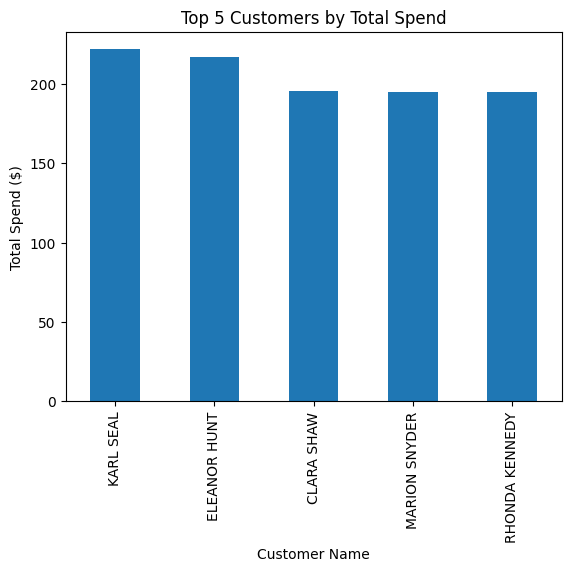

In [87]:
# Task 2a - Top 5 Customers by Total Spend
# JOIN: customer -> payment
top_customers = conn.sql("""
    SELECT 
        c.first_name || ' ' || c.last_name AS customer_name,
        ROUND(SUM(p.amount), 2) AS total_spend
    FROM staging.customer c
    JOIN staging.payment p ON c.customer_id = p.customer_id
    GROUP BY c.customer_id, c.first_name, c.last_name
    ORDER BY total_spend DESC
    LIMIT 5
""").df()

# Show The table
display(top_customers)

# Create the graph
top_customers.plot(
    kind="bar",
    x="customer_name",
    y="total_spend",
    xlabel="Customer Name",
    ylabel="Total Spend ($)",
    title="Top 5 Customers by Total Spend",
    legend=False,
)

,category_name,total_revenue
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


<Axes: title={'center': 'Total Revenue by Film Category'}, xlabel='Category', ylabel='Total Revenue ($)'>

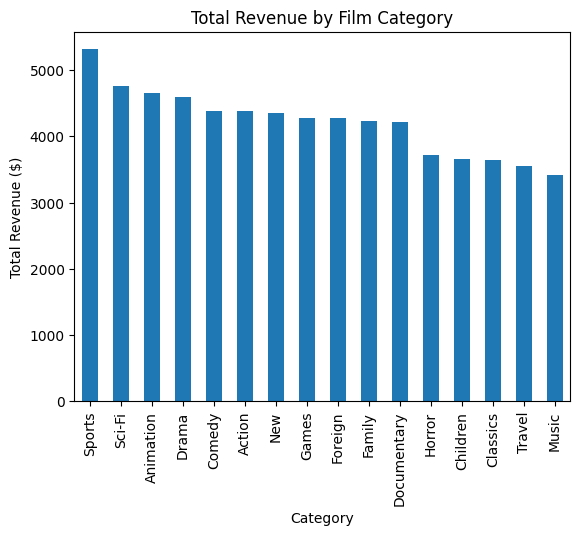

In [88]:
# Task 2b - Revenue by Category
# JOIN: category → film_category → inventory → rental → payment
category_revenue = conn.sql("""
    SELECT 
        cat.name AS category_name,
        ROUND(SUM(p.amount), 2) AS total_revenue
    FROM staging.category cat
    JOIN staging.film_category fc ON cat.category_id = fc.category_id
    JOIN staging.inventory i ON fc.film_id = i.film_id
    JOIN staging.rental r ON i.inventory_id = r.inventory_id
    JOIN staging.payment p ON r.rental_id = p.rental_id
    GROUP BY cat.name
    ORDER BY total_revenue DESC
""").df()

# Show the table
display(category_revenue)

# Create the graph
category_revenue.plot(
    kind="bar",
    x="category_name",
    y="total_revenue",
    xlabel="Category",
    ylabel="Total Revenue ($)",
    title="Total Revenue by Film Category",
    legend=False,
)